In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
class SIRModel:
    def __init__(self, n, s, i, r, alpha, beta, gamma, rho):
        assert n == s + i + r
        
        self.n = n
        self.s = s
        self.i = i
        self.r = r
        
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.rho = rho
        
        self.s_values = []
        self.i_values = []
        self.r_values = []
        self.t_values = []
    
    def dsdt(self):
        return -self.beta * self.s * self.i
    
    def didt(self):
        return (self.rho * self.beta * self.s * self.i) - (self.gamma * self.i) + (self.alpha * self.r)
    
    def drdt(self):
        return (self.gamma * self.i) - (self.alpha * self.r) + ((1-self.rho) * self.beta * self.s * self.i)

    def step(self, size):
        return (self.dsdt()*size, self.didt()*size, self.drdt()*size)
    
    def save_sir(self, t):
        self.s_values.append(self.s)
        self.i_values.append(self.i)
        self.r_values.append(self.r)
        self.t_values.append(t)
        
    def update_sir(self, derivatives):
        ds, di, dr = derivatives
        
        self.s += ds
        self.i += di
        self.r += dr
    
    def run_simulation(self, size=0.05, t_final=7):
        for t in np.arange(0, t_final, size):
            self.save_sir(t)
            derivatives = self.step(size)
            self.update_sir(derivatives)
            
    def plot_simulation(self, name="Regina George"):
        plt.plot(self.t_values, self.s_values)
        plt.plot(self.t_values, self.i_values)
        plt.plot(self.t_values, self.r_values)
        
        plt.title(f"Simulation of gossip spread, setup={name}")
        plt.ylabel("Population")
        plt.xlabel("Days")
        plt.legend(['Susceptible population', 'Infected population', 'Recovered population'])

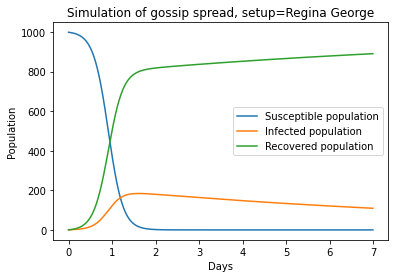

In [194]:
x = SIRModel(n=1000, s=999, i=1, r=0, alpha=0, beta=0.03, gamma=0.1, rho=0.2)
x.run_simulation(size=0.01)
x.plot_simulation()

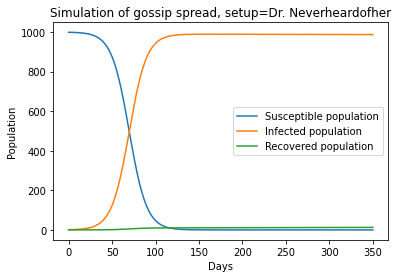

In [195]:
x = SIRModel(n=1000, s=999, i=1, r=0, alpha=0, beta=0.0001, gamma=0.00001, rho=0.99)
x.run_simulation(size=0.01, t_final=350)
x.plot_simulation(name="Dr. Neverheardofher")

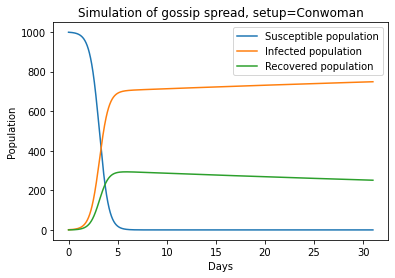

In [196]:
x = SIRModel(n=1000, s=999, i=1, r=0, alpha=0.009, beta=0.003, gamma=0.001, rho=0.7)
x.run_simulation(size=0.01, t_final=31)
x.plot_simulation(name="Conwoman")

In [197]:
class SIRModelWithTheta(SIRModel):
    def __init__(self, n, s, i, r, alpha, beta, gamma, rho, theta):
        super().__init__(n, s, i, r, alpha, beta, gamma, rho)
        self.theta = theta
    
    def dsdt(self):
        return -self.beta * self.theta * self.s * self.i
    
    def didt(self):
        return (self.rho * self.beta * self.theta * self.s * self.i) - (self.gamma * self.i) + (self.alpha * self.r)
    
    def drdt(self):
        return (self.gamma * self.i) - (self.alpha * self.r) + ((1-self.rho) * self.beta * self.theta * self.s * self.i)

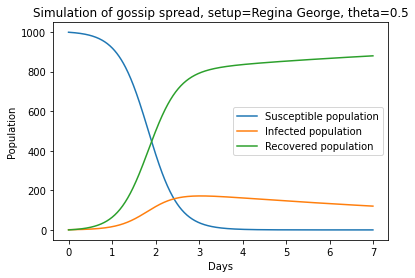

In [198]:
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0, beta=0.03, gamma=0.1, rho=0.2, theta=0.5)
x.run_simulation(size=0.01)
x.plot_simulation(name="Regina George, theta=0.5")

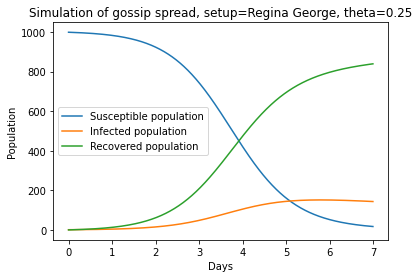

In [199]:
theta = 0.25
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0, beta=0.03, gamma=0.1, rho=0.2, theta=theta)
x.run_simulation(size=0.01)
x.plot_simulation(name=f"Regina George, theta={theta}")

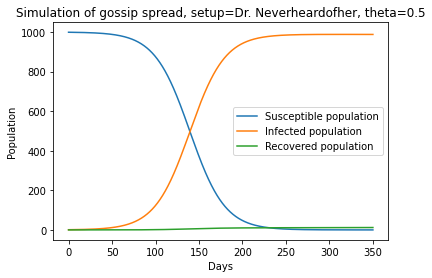

In [200]:
theta = 0.5
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0, beta=0.0001, gamma=0.00001, rho=0.99, theta=theta)
x.run_simulation(size=0.01, t_final=350)
x.plot_simulation(name=f"Dr. Neverheardofher, theta={theta}")

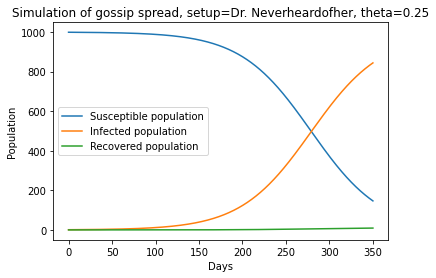

In [201]:
theta = 0.25
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0, beta=0.0001, gamma=0.00001, rho=0.99, theta=theta)
x.run_simulation(size=0.01, t_final=350)
x.plot_simulation(name=f"Dr. Neverheardofher, theta={theta}")

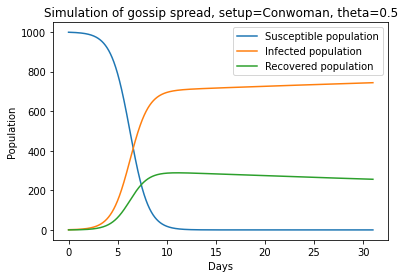

In [202]:
theta = 0.5
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0.009, beta=0.003, gamma=0.001, rho=0.7, theta=theta)
x.run_simulation(size=0.01, t_final=31)
x.plot_simulation(name=f"Conwoman, theta={theta}")

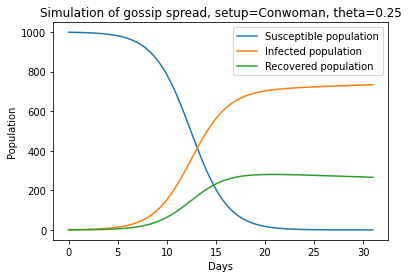

In [203]:
theta = 0.25
x = SIRModelWithTheta(n=1000, s=999, i=1, r=0, alpha=0.009, beta=0.003, gamma=0.001, rho=0.7, theta=theta)
x.run_simulation(size=0.01, t_final=31)
x.plot_simulation(name=f"Conwoman, theta={theta}")